# **Projeto Final**  <br>Analise inadimplência

## Dados

O Dataset utilizado nessa análise é composto pela base de dados fornecida pela EBAC. 

## Objetivo
Este projeto tem como objetivo analisar e compreender os motivos que levam um cliente a inadimplência, exibido pelo seguinte [dataset](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv) na segunda coluna (default), sendo o valor de 0 adimplênte e 1 inadimplênte.

## Importe de Dados

In [1]:
#importando as bibliotecas utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

In [2]:
#leitura dataset e atribuição de nome dos dados faltantes
df = pd.read_csv('/kaggle/input/credito/credito.csv', na_values='na')

In [3]:
#exploração do dataset
df.head(20)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


## Análise dos dados
Conhecendo melhor a estrutura do dataset, o schema e os dados faltantes.


### Estrutura

In [4]:
#análise geral
df.shape

(10127, 16)

In [5]:
#análise da quantidade de clientes adimplentes
df[df['default'] == 0].shape

(8500, 16)

In [6]:
#análise da quantidade de clientes inadimplentes
df[df['default'] == 1].shape

(1627, 16)

In [7]:
#armazena em variáveis
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [8]:
#cálculo de proporção
print(f'A proporcão clientes adimplentes é de: {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A proporcão clientes inadimplentes é de:  {round(100 * qtd_inadimplentes / qtd_total, 2)}%')

A proporcão clientes adimplentes é de: 83.93%
A proporcão clientes inadimplentes é de:  16.07%


### Schema

In [9]:
#análise do schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [10]:
#análise dos atributos categóricos
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [11]:
#análise dos atributos numéricos
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### Dados Faltantes

In [12]:
#análise de dados faltantes
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [13]:
#função que mostra estatísticas sobre os dados faltantes
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    
    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {col: {'quantidade': qtd, 'porcentagem': round(100 * qtd/total, 2)}}
            stats_dados_faltantes.append(dict_dados_faltantes)
           
    for stat in stats_dados_faltantes:
        print(stat)

In [14]:
#estatística geral
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [15]:
#estatística inadimplentes
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


In [16]:
#estatística adimplentes
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


## Processamento
Após determinar que a porcentagem de dados faltantes é práticamente a mesma para adimplentes (default = 0) e inadimpletes (default = 1), e também que existe um problema no schema em relação ao tipo das colunas (limite_credito e valor_transacoes_12m), pode-se dar início ao data wrangling.

In [17]:
#verificando estrutura
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Teste correção do tipo de dado em uma amostra do dataset:

In [18]:
#teste correção tipo das colunas
clean = lambda valor: float(valor.replace('.','').replace(',','.'))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(clean, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Correção do tipo de dado do dataset:

In [19]:
#aplica a função clean
df['limite_credito'] = df['limite_credito'].apply(clean)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(clean)

In [20]:
#verifica o schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10127 non-null  int64  
 1   default                  10127 non-null  int64  
 2   idade                    10127 non-null  int64  
 3   sexo                     10127 non-null  object 
 4   dependentes              10127 non-null  int64  
 5   escolaridade             8608 non-null   object 
 6   estado_civil             9378 non-null   object 
 7   salario_anual            9015 non-null   object 
 8   tipo_cartao              10127 non-null  object 
 9   meses_de_relacionamento  10127 non-null  int64  
 10  qtd_produtos             10127 non-null  int64  
 11  iteracoes_12m            10127 non-null  int64  
 12  meses_inativo_12m        10127 non-null  int64  
 13  limite_credito           10127 non-null  float64
 14  valor_transacoes_12m  

Correção dados faltantes do dataset:

In [21]:
#elimina dados faltantes
df.dropna(inplace=True)

In [22]:
#verifica o schema e a quantidade
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7081 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7081 non-null   int64  
 1   default                  7081 non-null   int64  
 2   idade                    7081 non-null   int64  
 3   sexo                     7081 non-null   object 
 4   dependentes              7081 non-null   int64  
 5   escolaridade             7081 non-null   object 
 6   estado_civil             7081 non-null   object 
 7   salario_anual            7081 non-null   object 
 8   tipo_cartao              7081 non-null   object 
 9   meses_de_relacionamento  7081 non-null   int64  
 10  qtd_produtos             7081 non-null   int64  
 11  iteracoes_12m            7081 non-null   int64  
 12  meses_inativo_12m        7081 non-null   int64  
 13  limite_credito           7081 non-null   float64
 14  valor_transacoes_12m     708

In [23]:
#verfica mudança na proporação
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporção adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporção de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporção clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporção adimplentes ativos é de 83.93%
A nova proporção de clientes adimplentes é de 84.28%

A proporção clientes inadimplentes é de 16.07%
A nova proporção de clientes inadimplentes é de 15.72%


## Visualização dos dados

### Visualização dos atributos categóricos

In [24]:
#set style e atribuição dataset default
sns.set_style("whitegrid")

df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

Atributo escolaridade:

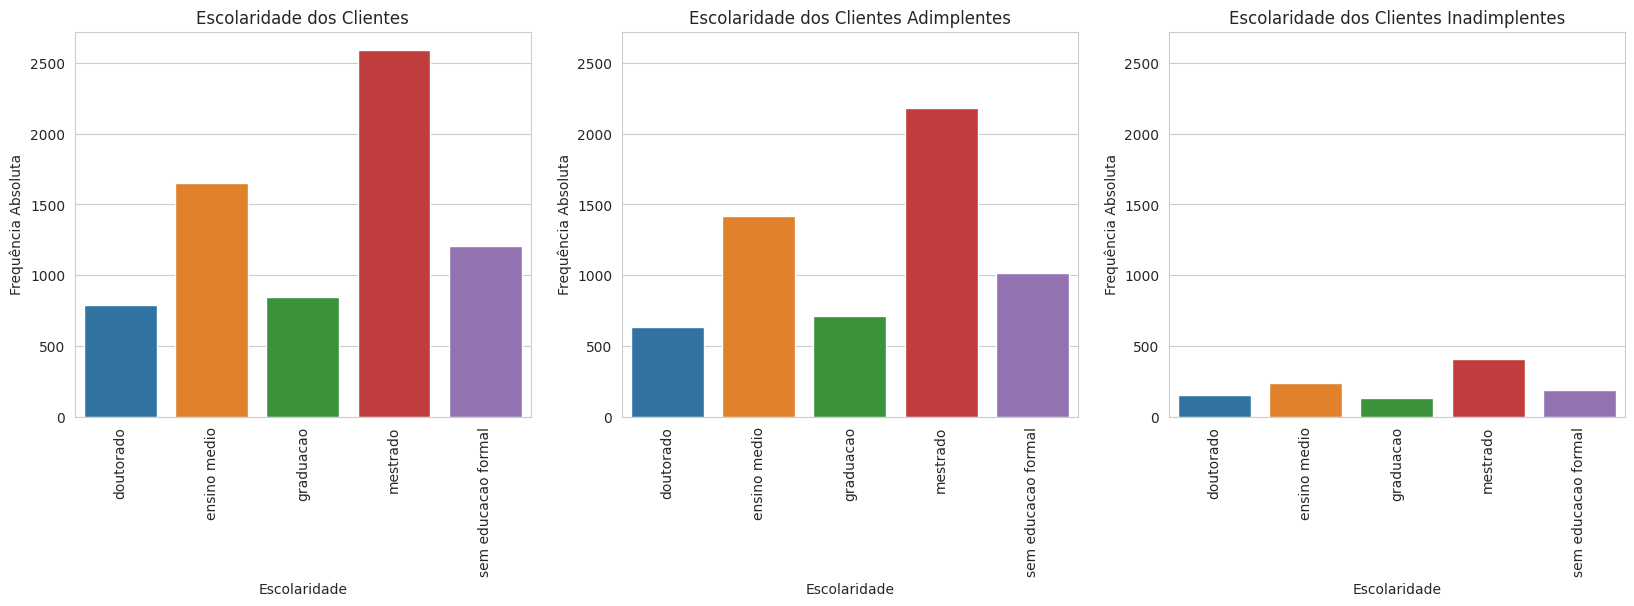

In [25]:
#escolaridade
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
   
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']

    df_to_plot.sort_values(by=[coluna], inplace=True)    

    f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])

    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    f.xaxis.set_major_locator(FixedLocator(range(len(df_to_plot[coluna]))))
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1
   
figura.show()

Atributo Estado Civil:

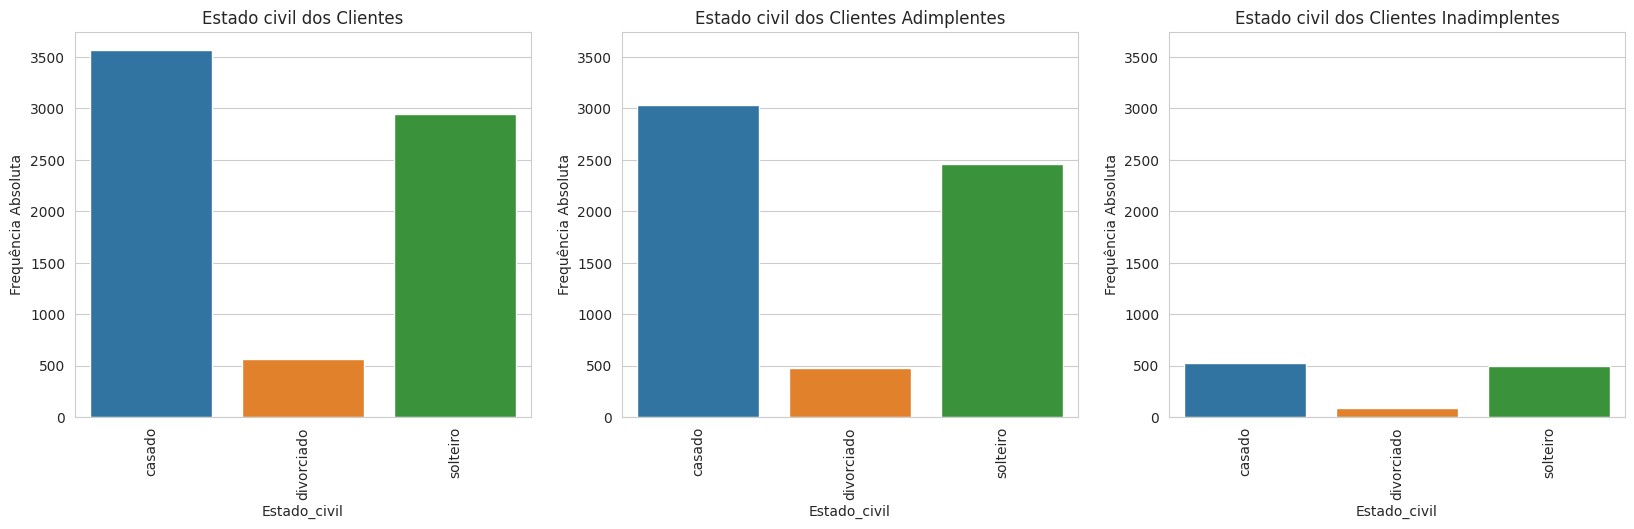

In [26]:
#estado civil
coluna = 'estado_civil'
titulos = ['Estado civil dos Clientes', 'Estado civil dos Clientes Adimplentes', 'Estado civil dos Clientes Inadimplentes']
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
   
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']

    df_to_plot.sort_values(by=[coluna], inplace=True)    

    f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])

    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    f.xaxis.set_major_locator(FixedLocator(range(len(df_to_plot[coluna]))))
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1
   
figura.show()

Atributo Salário Anual:

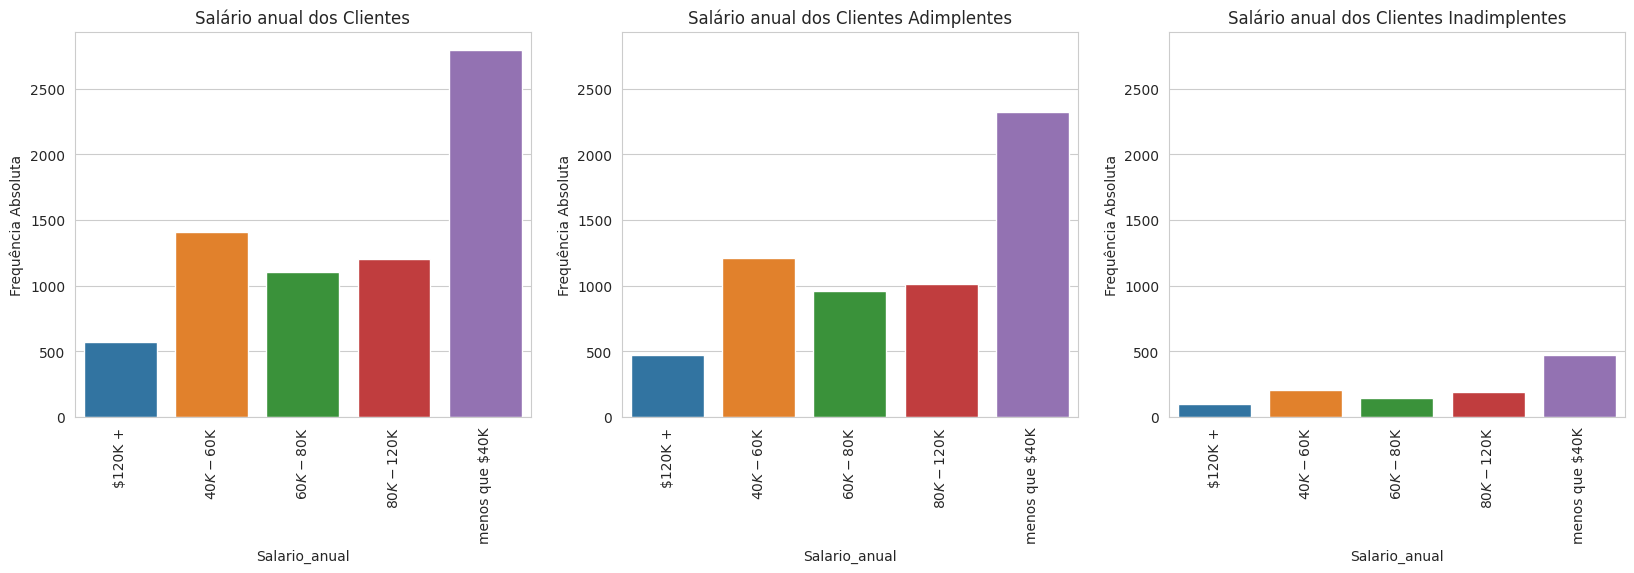

In [27]:
#salário anual
coluna = 'salario_anual'
titulos = ['Salário anual dos Clientes', 'Salário anual dos Clientes Adimplentes', 'Salário anual dos Clientes Inadimplentes']
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
   
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']

    df_to_plot.sort_values(by=[coluna], inplace=True)    

    f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])

    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    f.xaxis.set_major_locator(FixedLocator(range(len(df_to_plot[coluna]))))
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1
   
figura.show()

Atributo Tipo de Cartão:

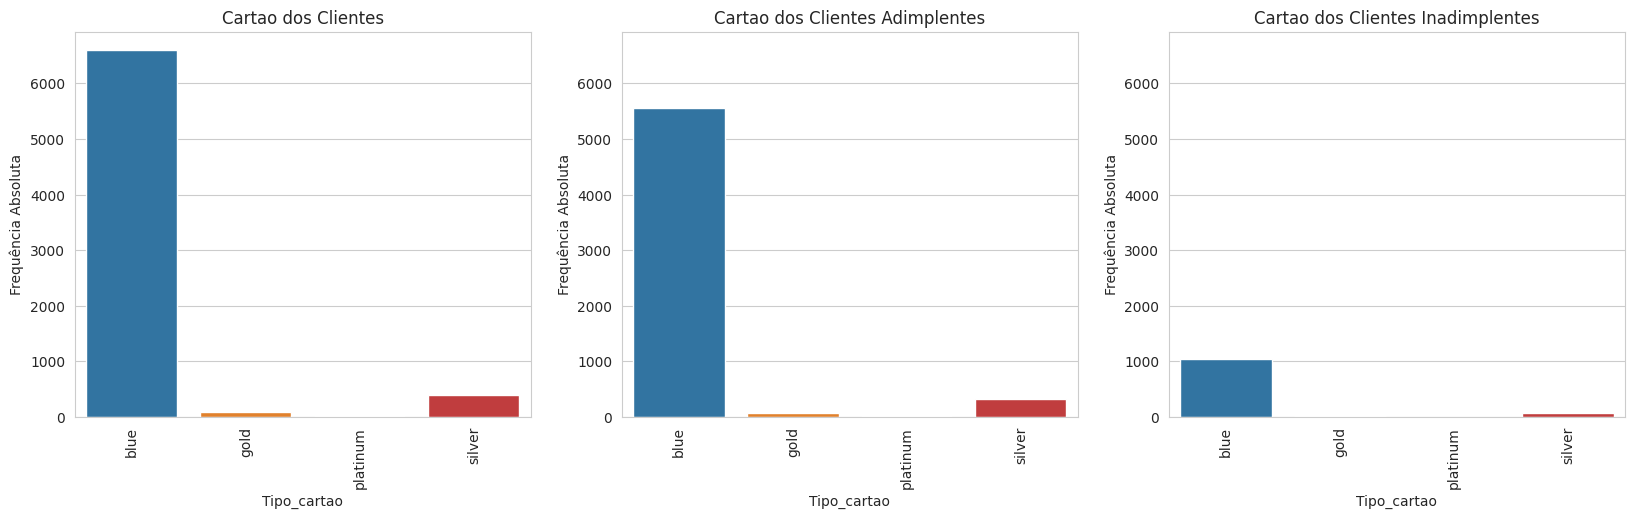

In [28]:
#tipo de cartão
coluna = 'tipo_cartao'
titulos = ['Cartao dos Clientes', 'Cartao dos Clientes Adimplentes', 'Cartao dos Clientes Inadimplentes']
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
   
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']

    df_to_plot.sort_values(by=[coluna], inplace=True)    

    f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])

    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    f.xaxis.set_major_locator(FixedLocator(range(len(df_to_plot[coluna]))))
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1
   
figura.show()

### Visualização dos atributos numéricos

Visualizando quais atributos devem ser analisados:

In [29]:
#visualiza os atributos numéricos
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Atributo Quantidade de Transações nos Últimos 12 Meses:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


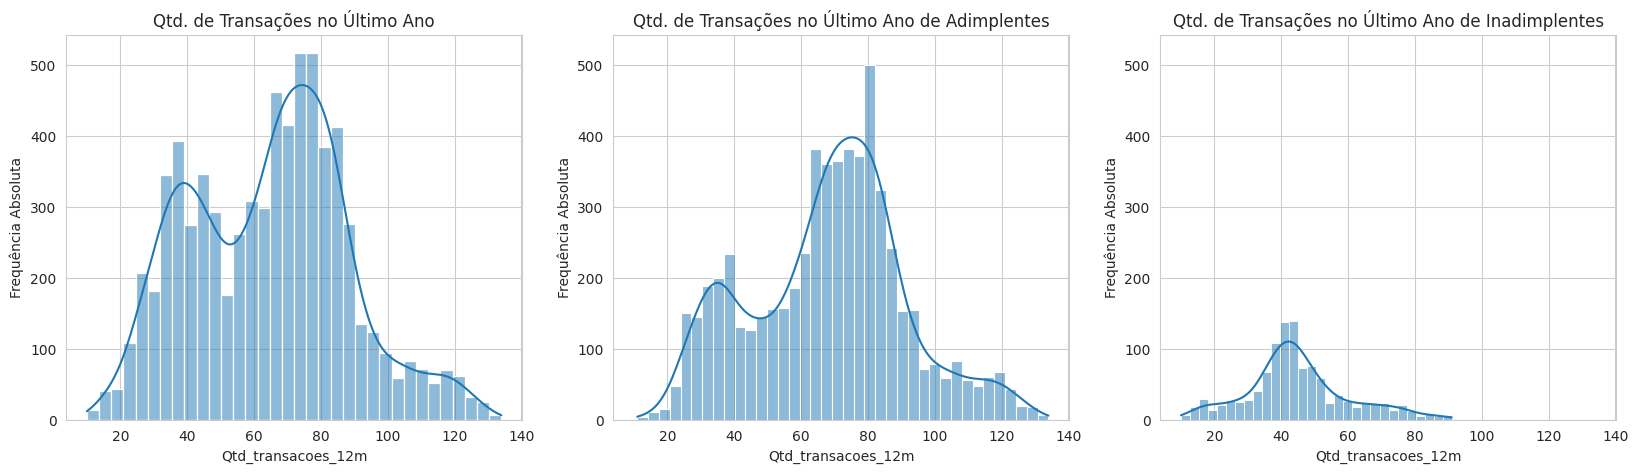

In [30]:
#quantidade de transações nos últimos 12 meses
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(
      data=dataframe, 
      x=coluna, kde=True, stat='count', ax=eixos[eixo]
  )

  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Atributo Valores das Transações nos últimos 12 meses:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


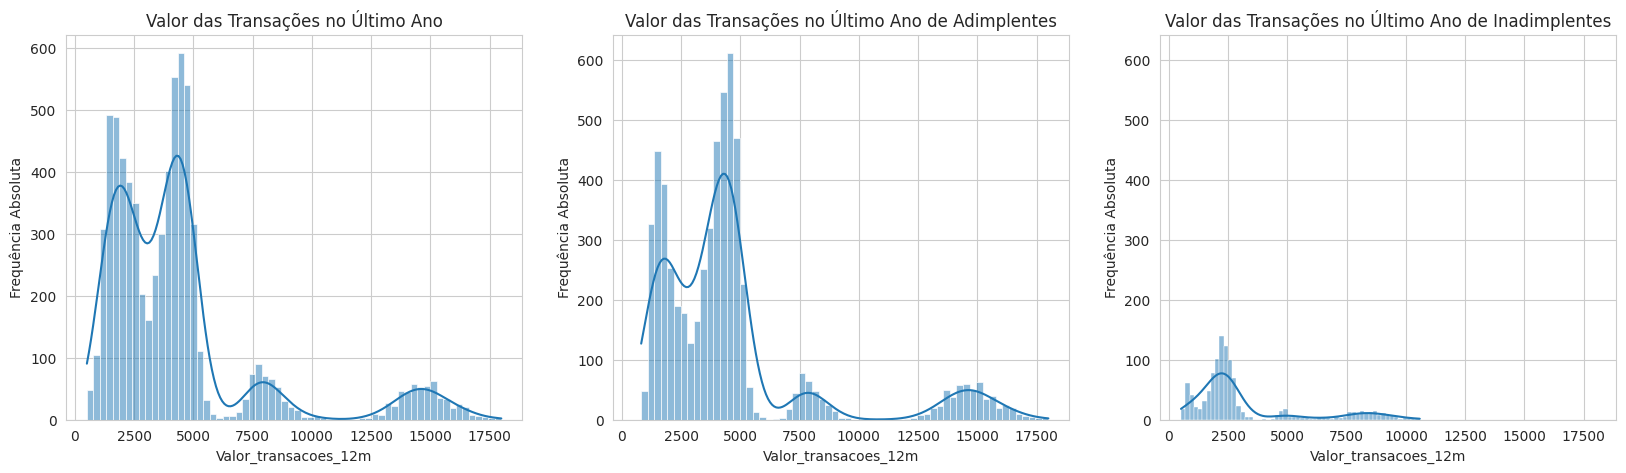

In [31]:
#valores das transações nos últimos 12 meses
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(
      data=dataframe, 
      x=coluna, kde=True, stat='count', ax=eixos[eixo]
  )

  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Gráfico que relaciona as informações dos atributos Valores das Transações nos Últimos 12 meses e Quantidade de Transações nos ùltimos 12 meses:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


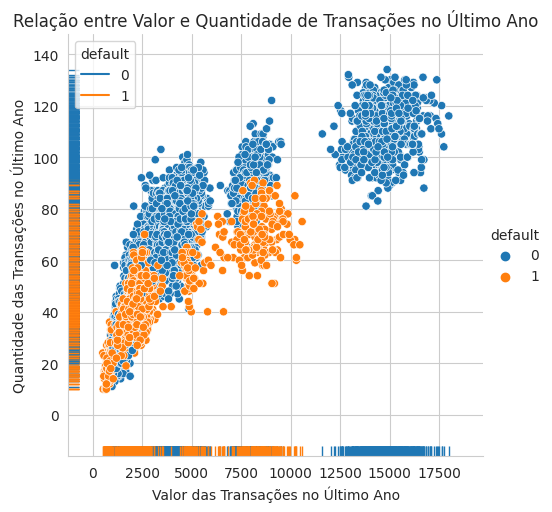

In [32]:
#gráfico que relaciona valor das transações com quantidade das transações
f = sns.relplot(
    data=df,
    x='valor_transacoes_12m', y='qtd_transacoes_12m', hue='default'
) 
g = sns.rugplot(
    data=df, 
    x='valor_transacoes_12m', y='qtd_transacoes_12m', hue='default'
)
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

## Insights

Com o intuito de melhor entender o que ocorre para que o cliente passe a preencher a coluna default, ou seja, se torne inadimplente, foram feitas análises a partir dos atributos tanto categóricos, quanto numéricos. A análise gerou as seguintes conclusões:

* Análises feitas nos atributos categóricos não geram resultados, pois a proporção e a distribuição nos gráficos é práticamente a mesma.

* Ao analisar quais atributos numéricos seriam de interesse para facilitar o entendimento, é possível constatar que os atributos (idade, dependentes, meses_de_relacionamento, qtd_produtos, iteracoes_12m, meses_inativo_12m e limite_credito) não trazem boas informações de comportamentos que aumentem o risco da inadimplência, pois todos os gráficos apresentam o mesmo padrão de curvatura. 

* Ao analisar os atributos (qtd_transacoes_12m e valor_transacoes_12m) é possível notar uma variação no padrão de curvatura nos gráficos, o que pode apresentar um padrão de comportamento de risco.

* Para a coluna 'qtd_transacoes_12m', nota-se que o padrão de transações do grupo de clintes inadimplentes se mantém entre 40 a 50 transações anuais, o que configura um possível comportamento de risco. Em contrapartida, a faixa de maior quantidade de transações por ano dos clientes adimplentes está entre 60 e 80. 

* Para a coluna 'valor_transacoes_12m', nota-se que em relação aos clientes adimplentes, os clientes inadimplentes possuem uma distruibuição mais concentrada no gráfico na faixa de 2000 até 2500, sendo também um indício para um possível comportamento de risco.

* Por fim, de acordo com os dados fornecidos e plotando as informações em um gráfico, é possível observar que o maior comportamento de risco para uma futura inadimplência é o do grupo de clientes que efetuam em média 40 transações por ano, no valor médio de R$ 2500.

